In [6]:
import pandas as pd
import numpy as np
import math
import copy
import random
import matplotlib.pyplot as plt
from math import sin, cos, acos, radians

In [7]:
CITIES_SIZE = 30
LOG_INTERVAL = 100
APPROX_R = 6371e3 # approximate radius of earth in km

df = pd.read_csv('data.csv', sep=',')
df['Население'] = df['Население'].astype(int)
df = df.sort_values(by=['Население'], ascending=False)
cities = pd.DataFrame(df, columns= ['Регион', 'Город', 'Широта','Долгота']).iloc[:CITIES_SIZE]

data = []
for i in range(len(cities)):
    y, x = cities.iloc[i]['Долгота'], cities.iloc[i]['Широта']
    name = cities.iloc[i]['Город']
    if name != name:
        name = cities.iloc[i]['Регион']
    data.append((name, x, y))

In [8]:
class SimulatedAnnealing:
    def __init__(self, data, iterations_number, t0, anneal_rate, temperature_minimal):
        self.data = data
        self.t0, self.t = t0, t0
        self.iterations_number = iterations_number
        self.min_t = temperature_minimal
        self.anneal_rate = anneal_rate
        self.solution_history = []
        self.best_solution = []
        

    def run(self):
        data, best_solution = self.data, []
        dist, i = self.get_total_distance(data), 0
        
        for i in range(1, self.iterations_number):
            new_data = self.nearest_neighbour_solution(data)
            new_dist = self.get_total_distance(new_data)
            
            if new_dist <= dist:
                best_solution = new_data
                dist = new_dist
            else:
                if self.acceptance_probability(dist, new_dist) > random.uniform(0,1):
                    best_solution, dist = new_data, new_dist
                else:
                    data = best_solution
                    
            if i % LOG_INTERVAL == 0:
                print('Iteration number: #', i, ' Minimal distance: ', dist)
            
            self.solution_history.append(dist)
            self.t = max(self.t0 * self.anneal_rate / i, self.min_t)
        
        self.best_solution = best_solution
        self.solution_history = self.solution_history
        
    
    def nearest_neighbour_solution(self, data):
        data_size = len(data) - 1
        i1 = random.randint(0, data_size)
        i2 = random.randint(0, data_size)
        
        big, small = i1, i2
        if i2 > big:
            big, small = i2, i1
        
        replacer = data[small:big].copy()
        replacer.reverse()
        
        return data[:small] + replacer + data[big:]
        
    
    def get_total_distance(self, data):
        total = 0
        for i in range(len(data)):
            total += self.get_distance_between_city(data[i], data[(i+1) % len(data)])
        return total
        
    
    def get_distance_between_city(self, city1, city2):
      lat_1, lon_1 = float(city1[1]), float(city1[2])  
      lat_2, lon_2 = float(city2[1]), float(city2[2]) 
        
      lat1, lat2 = radians(lat_1), radians(lat_2)
      lon1, lon2 = radians(lon_1), radians(lon_2)
      
      cosd = sin(lat1) * sin(lat2) + cos(lat1) * cos(lat2) * cos(lon1 - lon2)
    
      return (acos(cosd) * APPROX_R) / 1000
    
    
    def acceptance_probability(self, dist, new_dist):
        return math.exp((dist - new_dist) / self.t)
    
    
    def get_best_solution(self):
        return self.best_solution
    
    
    def get_solution_history(self):
        return self.solution_history

In [9]:
sa = SimulatedAnnealing(data = data, iterations_number = 3001, 
                        anneal_rate = .55, t0 = 10000, temperature_minimal = 0.00001)

sa.run()
solution = sa.get_best_solution()
min_dist = sa.get_total_distance(solution)

print('Total distance: ', min_dist)

Iteration number: # 100  Minimal distance:  45186.88784517606
Iteration number: # 200  Minimal distance:  35465.17206355247
Iteration number: # 300  Minimal distance:  32434.476460332484
Iteration number: # 400  Minimal distance:  29712.91305136149
Iteration number: # 500  Minimal distance:  26677.39541455191
Iteration number: # 600  Minimal distance:  26274.064188921715
Iteration number: # 700  Minimal distance:  24083.218811228133
Iteration number: # 800  Minimal distance:  22870.21229667032
Iteration number: # 900  Minimal distance:  18914.37273749628
Iteration number: # 1000  Minimal distance:  18886.480490737977
Iteration number: # 1100  Minimal distance:  18808.28455996106
Iteration number: # 1200  Minimal distance:  18439.81814664492
Iteration number: # 1300  Minimal distance:  18439.81814664492
Iteration number: # 1400  Minimal distance:  18357.332727484514
Iteration number: # 1500  Minimal distance:  18357.332727484514
Iteration number: # 1600  Minimal distance:  18313.1643357

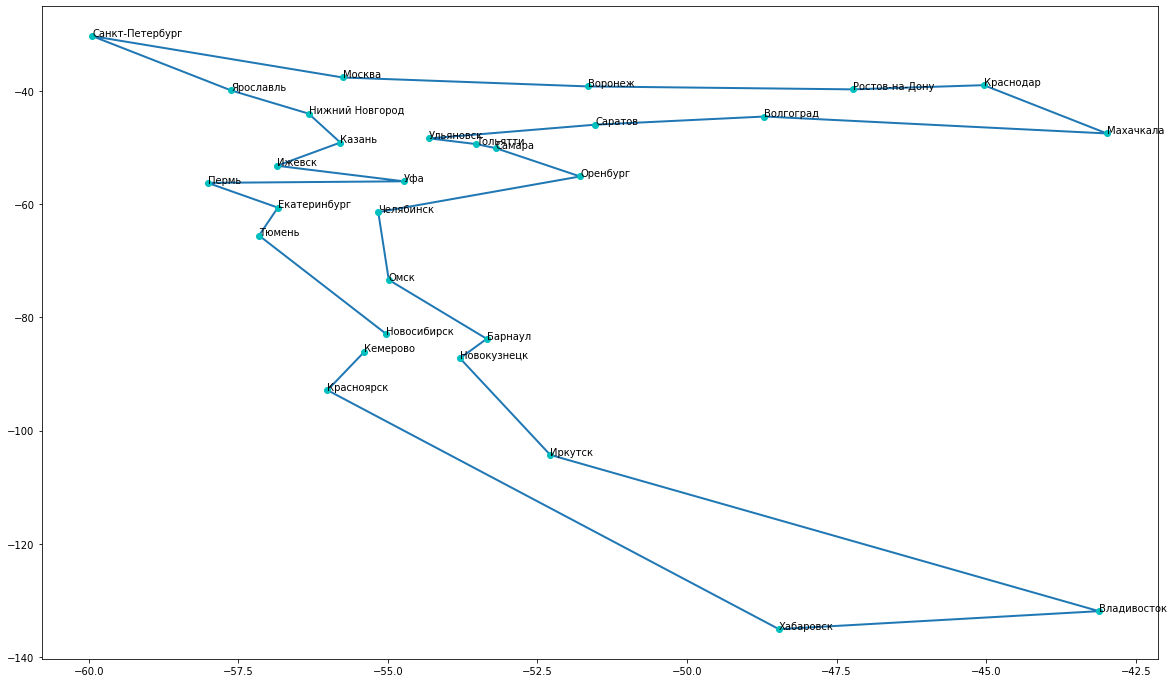

In [10]:
fig, ax = plt.subplots(figsize=(20, 12))
line, = plt.plot([], [], lw=2)
x, y, lines_x, lines_y = [], [], [], []
for i in range(len(solution)):
    # get current coords
    coord_x, coord_y = -solution[i][1], -solution[i][2]
    # add for points
    x.append(coord_x)
    y.append(coord_y)

    # add coords for lines
    lines_x.append(coord_x)
    lines_y.append(coord_y)
    
    # add labels for points
    plt.annotate(solution[i][0], (coord_x, coord_y))
    
line.set_data(lines_x, lines_y)
plt.plot(x, y, 'co')